registering


C:\Users\Magdy Amin\Downloads\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


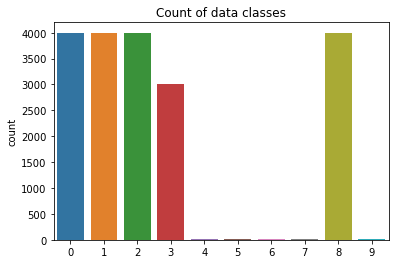

INFO flower 2022-11-28 15:46:29,436 | connection.py:102 | Opened insecure gRPC connection (no certificates were passed)
DEBUG flower 2022-11-28 15:46:29,441 | connection.py:39 | ChannelConnectivity.IDLE
DEBUG flower 2022-11-28 15:46:29,652 | connection.py:121 | gRPC channel closed


_MultiThreadedRendezvous: <_MultiThreadedRendezvous of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "DNS resolution failed for localhost:-f: UNAVAILABLE: WSA Error"
	debug_error_string = "UNKNOWN:Failed to pick subchannel {created_time:"2022-11-28T13:46:29.4447993+00:00", children:[UNKNOWN:DNS resolution failed for localhost:-f: UNAVAILABLE: WSA Error {grpc_status:14, created_time:"2022-11-28T13:46:29.4447939+00:00"}]}"
>

In [3]:
import flwr as fl
import tensorflow as tf
from tensorflow import keras
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import socket
# class client:
#     def __init__(self):

# class client1(client):
# AUxillary methods
class client2(fl.client.NumPyClient):
    SERVER_IP = '192.168.20.1'
    SERVER_PORT = 5678

    #     s.send(b'Done')

# Define Flower client

    signature=''
    x='client2'
    x=x.encode('utf-8')
    with socket.socket(socket.AF_INET , socket.SOCK_STREAM) as s:
        s.connect((SERVER_IP, SERVER_PORT))
        print(f'registering')
        data = s.recv(1024)
        data=data.decode('utf-8')
        signature=data.encode('utf-8')
        s.send(x)
    with socket.socket(socket.AF_INET , socket.SOCK_STREAM) as s:
        s.connect((SERVER_IP, SERVER_PORT))
    #     s.send(b'authenticate please')
        s.send(signature)
#         data = s.recv(1024)
    def getDist(y):
        ax = sns.countplot(y)
        ax.set(title="Count of data classes")
        plt.show()

    def getData(dist, x, y):
        dx = []
        dy = []
        counts = [0 for i in range(10)]
        for i in range(len(x)):
            if counts[y[i]]<dist[y[i]]:
                dx.append(x[i])
                dy.append(y[i])
                counts[y[i]] += 1

        return np.array(dx), np.array(dy)

    # Load and compile Keras model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

    # Load dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
    dist = [4000, 4000, 4000, 3000, 10, 10, 10, 10, 4000, 10]
    x_train, y_train = getData(dist, x_train, y_train)
    getDist(y_train)
    def get_parameters(self):
        return model.get_weights()

    def fit(self, parameters, config):
        model.set_weights(parameters)
        r = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), verbose=0)
        hist = r.history
        print("Fit history : " ,hist)
        return model.get_weights(), len(x_train), {}

    def evaluate(self, parameters, config):
        model.set_weights(parameters)
        loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
        print("Eval accuracy : ", accuracy)
        return loss, len(x_test), {"accuracy": accuracy}
    
fl.client.start_numpy_client(
    server_address="localhost:"+str(sys.argv[1]), 
    client=client2(),
    grpc_max_message_length = 1024*1024*1024
)

# Start Flower client